# Machine Learning HW1
## gh8sj due september 22nd 2022

In [ ]:
import numpy as np
from scipy.stats import norm
import math
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy.random as random
from numpy import*
from matplotlib.pyplot import*
import pandas as pd
from scipy.optimize import brentq
import random
import matplotlib.pyplot as plt
from numpy.random import normal

# 2

In [7]:
x = np.linspace(-3,4, 1000)
comp1 = (0.5)*stats.norm.pdf(x, mu1, sigma1)
comp2 = (0.5)*stats.norm.pdf(x,mu2,sigma2)

<function matplotlib.pyplot.show(close=None, block=None)>

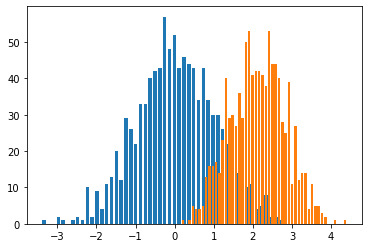

In [14]:
random.seed(42)
pi = np.pi
mu1 = 0
variance1 = 1
mu2 = (2/3)*pi
variance2 = 0.5
sigma1 = math.sqrt(variance1)
sigma2 = math.sqrt(variance2)
comp1_sample = normal(mu1, sigma1,1000)
comp2_sample = normal(mu2, sigma2,1000)
plt.hist(comp1_sample, bins= 50, rwidth = 0.75)
plt.hist(comp2_sample, bins = 50, rwidth = 0.75)
plt.show

In [15]:
def find_roots(x, y):
    s = np.abs(np.diff(np.sign(y))).astype(bool)
    return x[:-1][s] + np.diff(x)[s] / (np.abs(y[1:][s] / y[:-1][s]) + 1)


[1.1120811] [0.10748036]


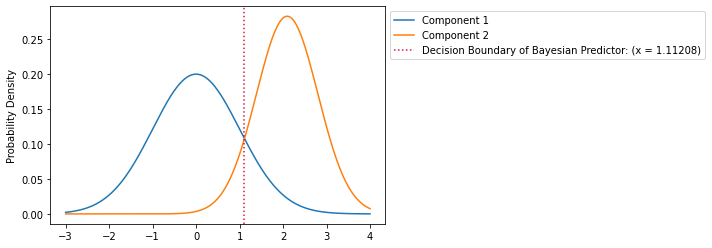

In [16]:
pi = np.pi
mu1 = 0
variance1 = 1
mu2 = (2/3)*pi
variance2 = 0.5
sigma1 = math.sqrt(variance1)
sigma2 = math.sqrt(variance2)
x = np.linspace(-3,4, 1000)
plt.plot(x, (0.5)*stats.norm.pdf(x, mu1, sigma1), label=('Component 1'))
plt.plot(x,(0.5*stats.norm.pdf(x, mu2, sigma2)), label = ('Component 2'))
plt.ylabel('Probability Density')
for ya, yb in [(comp1, comp2)]:
    x0 = find_roots(x, ya - yb)
    y0 = np.interp(x0, x, ya)
    print(x0, y0)
plt.axvline(x0, color='crimson', ls=':', label=('Decision Boundary of Bayesian Predictor: (x = 1.11208)'))
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

In [17]:
print('The Decision Boundary of the Bayesian Prediction is: ',x0[0])

The Decision Boundary of the Bayesian Prediction is:  1.1120810958682477


### 2b

In [18]:
x = np.linspace(-3,4, 1000)
cdf1x = np.linspace(x0,4, 1000)
cdf2x = np.linspace(-3,x0, 1000)

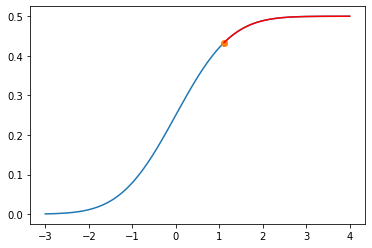

In [19]:
plt.plot(x,.5*(stats.norm.cdf(x, mu1, sigma1)))
plt.plot(x0,.5*(stats.norm.cdf(x0, mu1, sigma1)), marker= 'o')
plt.plot(cdf1x, .5*(stats.norm.cdf(cdf1x, mu1, sigma1)), color='red')


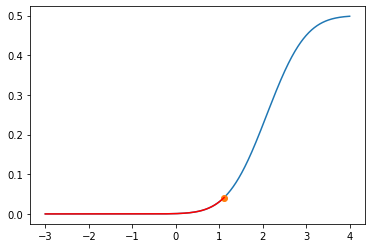

In [20]:
plt.plot(x,.5*(stats.norm.cdf(x, mu2, sigma2)))
plt.plot(x0,.5*(stats.norm.cdf(x0, mu2, sigma2)), marker= 'o')
plt.plot(cdf2x, .5*(stats.norm.cdf(cdf2x, mu2, sigma2)), color='red')


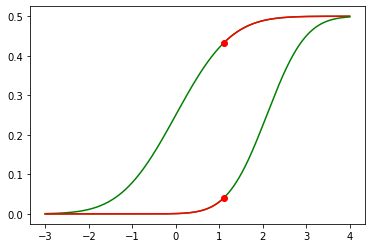

In [72]:
plt.plot(x,.5*(stats.norm.cdf(x, mu1, sigma1)), color = 'green')
plt.plot(x0,.5*(stats.norm.cdf(x0, mu1, sigma1)), marker= 'o', color = 'red')
plt.plot(cdf1x, .5*(stats.norm.cdf(cdf1x, mu1, sigma1)), color='red')

plt.plot(x,.5*(stats.norm.cdf(x, mu2, sigma2)), color = 'green')
plt.plot(x0,.5*(stats.norm.cdf(x0, mu2, sigma2)), marker= 'o', color = 'red')
plt.plot(cdf2x, .5*(stats.norm.cdf(cdf2x, mu2, sigma2)), color='red')
plt.show()

In [73]:
E1 = .5*(1 - (norm(loc = mu1 , scale = sigma1).cdf(x0)))
E1

array([0.06652582])

In [74]:
E2 = .5*(norm(loc = mu2 , scale = sigma2).cdf(x0))
E2

array([0.04119285])

In [75]:
Et = (E1+E2)
Et
print('The True Error (L_D(h^*)) for this distribution is: ', Et[0])

The True Error (L_D(h^*)) for this distribution is:  0.10771867033695104


### 2c

#### With the following hypothesis space H and the data distribution in equation 3, please
#### find out the best hypothesis h∗ ∈ H and report the corresponding decision boundary b∗
### H={ i/400 :i∈[1200]}

In [66]:
# the value in the hypothesis space closest to the bayesian boundary is 445
t = x0 
values = []
diff = []
for i in range(1200):
    values.append(i/400)
    diff.append(abs((i/400)-x0))

b_h = diff.index(min(diff))
b_h_v = values[b_h]
print("The best hypothesis in the hypthesis space is: ", b_h, "\nThe corresponding boundary is: ", b_h_v)


The best hypothesis in the hypthesis space is:  445 
The corresponding boundary is:  1.1125


### 2d

In [69]:
E1 = .5*(1 - (norm(loc = mu1 , scale = sigma1).cdf(b_h_v)))
E2 = .5*(norm(loc = mu2 , scale = sigma2).cdf(b_h_v))
Et = (E1+E2)
print('The True Error (L_D(h^*)) for this hypothesis space is: ', Et)

The True Error (L_D(h^*)) for this hypothesis space is:  0.10771869912674997


### 2e

(array([[ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  3.,  3.,  3.,  2.,  3.,  2.,
          2.,  3.,  5.,  4.,  3.,  1.,  5.,  3., 12.,  3.,  3.,  8.,  4.,
          1.,  7.,  6.,  1.,  1.,  2.,  1.,  2.,  1.,  1.,  3.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          2.,  1.,  3.,  3.,  2.,  3.,  7.,  5.,  7.,  7.,  5.,  5.,  8.,
         10.,  6.,  5.,  7.,  6.,  2.,  2.,  1.,  1.,  0.,  2.]]),
 array([-2.48456680e+00, -2.36043734e+00, -2.23630787e+00, -2.11217841e+00,
        -1.98804895e+00, -1.86391949e+00, -1.73979003e+00, -1.61566057e+00,
        -1.49153110e+00, -1.36740164e+00, -1.24327218e+00, -1.11914272e+00,
        -9.95013258e-01, -8.70883796e-01, -7.46754334e-01, -6.22624873e-01,
        -4.98495411e-01, -3.74365949e-01, -2.50236488e-01, -1.26107026e-01,
        -1.97756424e-03,  1.22151897e-01,  2

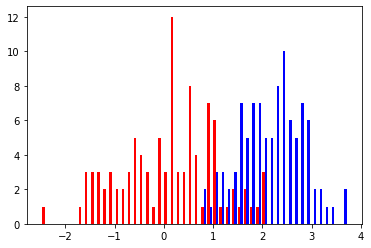

In [257]:
pi = np.pi
mu1 = 0
variance1 = 1
mu2 = (2/3)*pi
variance2 = 0.5
sigma1 = math.sqrt(variance1)
sigma2 = math.sqrt(variance2)

N = 100 # sample size
comp_idx = [1,2]
x_pos, x_neg = [], [] # observations

# There is a more efficient way than the for loop
for i in range(N):
    x_pos.append(normal(mu1, sigma1))
    x_neg.append(normal(mu2,sigma2))
    
# print(x_pos)
# print(x_neg)

plt.hist([x_pos,x_neg], bins=50, color=['r','b'])
#plt.savefig("data-gen.png")

In [258]:
x_label = [1]*100
x_n_label = [-1]*100
all_x =  x_neg + x_pos
all_y = x_label + x_n_label

In [259]:
import operator
def compute_empirical_risk(x, y, b=0.5):
    error_counts = 0.0

    for (idx,val) in enumerate(x):
        if (val <= b) and (y[idx] > 0):
            error_counts += 1
        elif (val > b) and (y[idx] < 0):
            error_counts += 1
            
    return error_counts/len(x)

def find_thresh(x, y):
    res = {}
    sorted_x = sorted(x)
    for idx in range(len(x)-1):
        if idx % 100 == 0:
            print(idx)
        b = (x[idx] + x[idx+1])/2
        r = compute_empirical_risk(x, y, b)
        res[b] = r
    sorted_res = sorted(res.items(), key=operator.itemgetter(1))
    print(sorted_res[0])
    return sorted_res[0]

In [277]:
stats = []
for num in range(1200):
    stats.append(compute_empirical_risk(all_x,all_y, b = (num)/400))
print("The hypothesis that minimizes the empirical error is: i=", stats.index(min(stats)), "\nThe corresponding decision boundary is: ", stats.index(min(stats))/400)

The hypothesis that minimizes the empirical error is: i= 434 
The corresponding decision boundary is:  1.085


## 2f

In [278]:
b, er = find_thresh(all_x, all_y)
print("The true error is: ", er)

0
100
(1.1448542941710327, 0.09)
The true error is:  0.09


# 3

## implementing perceptron

In [1120]:
data = np.genfromtxt('../data.txt', delimiter='\t')
data;

In [1094]:
epochs = 1000
x = data[:,0:2]
m, n = x.shape
y = data[:,2]
w = np.zeros((len(x[0])+1,1))

for i in range(epochs):
        for index, sample in enumerate(x):
            x_i = np.insert(sample, 0, np.ones(1)).reshape(3,1)
            if y[index]*inner(w.T.squeeze(),x_i.squeeze()) <= 0:
                w = w + y[index]*x_i
print(w)

[[ 2.  ]
 [-3.52]
 [-1.24]]


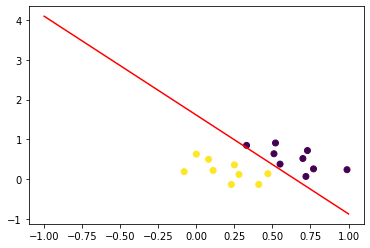

In [1100]:
# Add some labels here
plt.scatter(data[:,0], data[:,1], c = data[:,2])
x = linspace(-1,1,100)
plt.plot(x, -2.48*x + 1.61, color = 'red')

plt.show()